In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
covid_df = pd.read_csv("covid_19_india.csv")
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

In [5]:
covid_df.head()

Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [6]:
covid_df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis = 1, inplace = True)

In [7]:
covid_df.head()

Date State/UnionTerritory  Cured  Deaths  Confirmed
0  2020-01-30               Kerala      0       0          1
1  2020-01-31               Kerala      0       0          1
2  2020-02-01               Kerala      0       0          2
3  2020-02-02               Kerala      0       0          3
4  2020-02-03               Kerala      0       0          3

In [8]:
covid_df['Active_cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

In [9]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  18110 non-null  object
 1   State/UnionTerritory  18110 non-null  object
 2   Cured                 18110 non-null  int64 
 3   Deaths                18110 non-null  int64 
 4   Confirmed             18110 non-null  int64 
 5   Active_cases          18110 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 849.0+ KB


In [10]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [11]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18110 non-null  datetime64[ns]
 1   State/UnionTerritory  18110 non-null  object        
 2   Cured                 18110 non-null  int64         
 3   Deaths                18110 non-null  int64         
 4   Confirmed             18110 non-null  int64         
 5   Active_cases          18110 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 849.0+ KB


In [13]:
#Create Pivot Table
statewise = pd.pivot_table(covid_df, values = ['Confirmed', 'Cured', 'Deaths'], index = 'State/UnionTerritory', aggfunc = max)

In [15]:
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']
statewise['Mortality Rate'] = statewise['Deaths']*100 / statewise['Confirmed']
statewise = statewise.sort_values('Confirmed', ascending = False)
statewise.style.background_gradient(cmap = 'cubehelix')

C:\Users\NOBODY\AppData\Local\Temp\ipykernel_8920\391276493.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_active_cases = covid_df.groupby('State/UnionTerritory')['Active_cases', 'Date'].max().sort_values('Active_cases', ascending = False).reset_index()


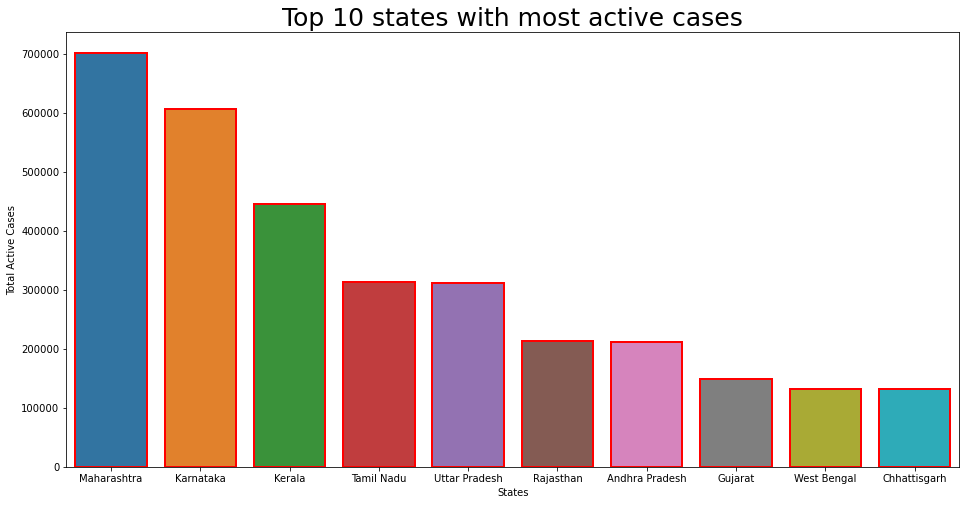

In [22]:
#Top 10 states with most active cases
top_10_active_cases = covid_df.groupby('State/UnionTerritory')['Active_cases', 'Date'].max().sort_values('Active_cases', ascending = False).reset_index()

fig = plt.figure(figsize = (16,8))
ax = sns.barplot(top_10_active_cases.iloc[:10], x = 'State/UnionTerritory', y = 'Active_cases', linewidth = 2, edgecolor = 'red')
plt.title("Top 10 states with most active cases", size = 25)
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

C:\Users\NOBODY\AppData\Local\Temp\ipykernel_8920\186563100.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_10_deaths = covid_df.groupby('State/UnionTerritory')['Deaths', 'Date'].max().sort_values('Deaths', ascending = False).reset_index()


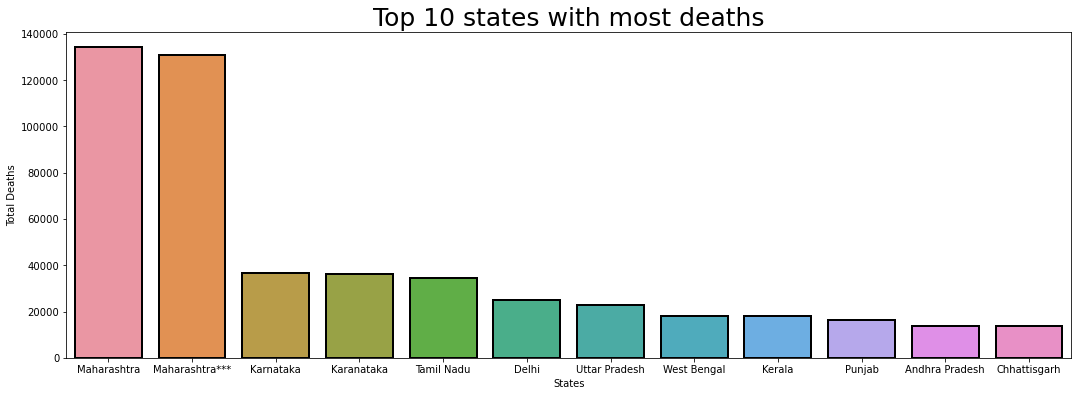

In [25]:
#Top 10 states with most deaths
top_10_deaths = covid_df.groupby('State/UnionTerritory')['Deaths', 'Date'].max().sort_values('Deaths', ascending = False).reset_index()

fig = plt.figure(figsize = (18,6))
ax = sns.barplot(top_10_deaths.iloc[:12], x = 'State/UnionTerritory', y = 'Deaths', linewidth = 2, edgecolor = 'black')
plt.title("Top 10 states with most deaths", size = 25)
plt.xlabel("States")
plt.ylabel("Total Deaths")
plt.show()

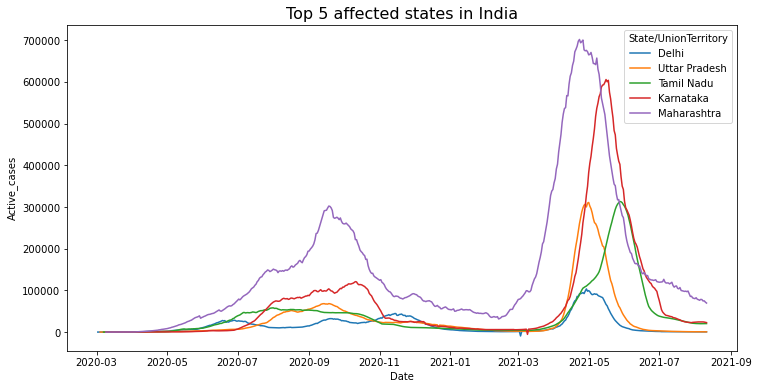

In [29]:
#Top 5 affected states in India
fig = plt.figure(figsize = (12,6))
ax = sns.lineplot(covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Delhi', 'Uttar Pradesh'])], x = 'Date', y= 'Active_cases', hue = 'State/UnionTerritory')
plt.title("Top 5 affected states in India", size = 16)
plt.xlabel("Date")
plt.ylabel("Active_cases")
plt.show()

In [31]:
vaccine_df.head()

Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                   58604.0    8532.0   4954.0   
2  18/01/2021  India                   99449.0   13611.0   6583.0   
3  19/01/2021  India                  195525.0   17855.0   7951.0   
4  20/01/2021  India                  251280.0   25472.0  10504.0   

   First Dose Administered  Second Dose Administered  \
0                  48276.0                       0.0   
1                  58604.0                       0.0   
2                  99449.0                       0.0   
3                 195525.0                       0.0   
4                 251280.0                       0.0   

   Male (Doses Administered)  Female (Doses Administered)  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
0                               NaN  ...                               NaN   
1                               NaN  ...                               NaN   
2                               NaN  ...                               NaN   
3                               NaN  ...                               NaN   
4                               NaN  ...                               NaN   

   45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   

   18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
0                                  NaN                                  NaN   
1                                  NaN                                  NaN   
2                                  NaN                                  NaN   
3                                  NaN                                  NaN   
4                                  NaN                                  NaN   

   60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
0                                NaN                       23757.0   
1                                NaN                       27348.0   
2                                NaN                       41361.0   
3                                NaN                       81901.0   
4                                NaN                       98111.0   

   Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
0                         24517.0                                  2.0   
1                         31252.0                                  4.0   
2                         58083.0                                  5.0   
3                        113613.0                                 11.0   
4                        153145.0                                 24.0   

   Total Individuals Vaccinated  
0                       48276.0  
1                       58604.0  
2                       99449.0  
3                      195525.0  
4                      251280.0  

[5 rows x 24 columns]

In [33]:
#Removing Invalid State
vaccine_df = vaccine_df[vaccine_df['State'] != 'India']

In [34]:
vaccine_df.head()

Updated On                        State  Total Doses Administered  \
212  16/01/2021  Andaman and Nicobar Islands                      23.0   
213  17/01/2021  Andaman and Nicobar Islands                      23.0   
214  18/01/2021  Andaman and Nicobar Islands                      42.0   
215  19/01/2021  Andaman and Nicobar Islands                      89.0   
216  20/01/2021  Andaman and Nicobar Islands                     124.0   

     Sessions   Sites   First Dose Administered  Second Dose Administered  \
212       2.0      2.0                     23.0                       0.0   
213       2.0      2.0                     23.0                       0.0   
214       9.0      2.0                     42.0                       0.0   
215      12.0      2.0                     89.0                       0.0   
216      16.0      3.0                    124.0                       0.0   

     Male (Doses Administered)  Female (Doses Administered)  \
212                       12.0                         11.0   
213                       12.0                         11.0   
214                       29.0                         13.0   
215                       53.0                         36.0   
216                       67.0                         57.0   

     Transgender (Doses Administered)  ...  18-44 Years (Doses Administered)  \
212                               0.0  ...                               NaN   
213                               0.0  ...                               NaN   
214                               0.0  ...                               NaN   
215                               0.0  ...                               NaN   
216                               0.0  ...                               NaN   

     45-60 Years (Doses Administered)  60+ Years (Doses Administered)  \
212                               NaN                             NaN   
213                               NaN                             NaN   
214                               NaN                             NaN   
215                               NaN                             NaN   
216                               NaN                             NaN   

     18-44 Years(Individuals Vaccinated)  45-60 Years(Individuals Vaccinated)  \
212                                  NaN                                  NaN   
213                                  NaN                                  NaN   
214                                  NaN                                  NaN   
215                                  NaN                                  NaN   
216                                  NaN                                  NaN   

     60+ Years(Individuals Vaccinated)  Male(Individuals Vaccinated)  \
212                                NaN                           NaN   
213                                NaN                           NaN   
214                                NaN                           NaN   
215                                NaN                           NaN   
216                                NaN                           NaN   

     Female(Individuals Vaccinated)  Transgender(Individuals Vaccinated)  \
212                             NaN                                  NaN   
213                             NaN                                  NaN   
214                             NaN                                  NaN   
215                             NaN                                  NaN   
216                             NaN                                  NaN   

     Total Individuals Vaccinated  
212                          23.0  
213                          23.0  
214                          42.0  
215                          89.0  
216                         124.0  

[5 rows x 24 columns]

In [36]:
vaccine = vaccine_df[['Updated On', 'State', 'Male (Doses Administered)', 'Female (Doses Administered)', 'Total Individuals Vaccinated']]

In [38]:
vaccine.rename(columns = {'Updated On':'Date', 'Total Individuals Vaccinated':'Total'}, inplace = True)
vaccine.head()

C:\Users\NOBODY\AppData\Local\Temp\ipykernel_8920\1612112090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine.rename(columns = {'Updated On':'Date', 'Total Individuals Vaccinated':'Total'}, inplace = True)


Date                        State  Male (Doses Administered)  \
212  16/01/2021  Andaman and Nicobar Islands                       12.0   
213  17/01/2021  Andaman and Nicobar Islands                       12.0   
214  18/01/2021  Andaman and Nicobar Islands                       29.0   
215  19/01/2021  Andaman and Nicobar Islands                       53.0   
216  20/01/2021  Andaman and Nicobar Islands                       67.0   

     Female (Doses Administered)  Total  
212                         11.0   23.0  
213                         11.0   23.0  
214                         13.0   42.0  
215                         36.0   89.0  
216                         57.0  124.0

In [39]:
males = vaccine['Male (Doses Administered)'].sum()
females = vaccine['Female (Doses Administered)'].sum()

In [40]:
#Males vs Females vaccinated
px.pie(names = ['males', 'females'], values = [males, females], title = 'Males vs Females vaccinated')

C:\Users\NOBODY\AppData\Local\Temp\ipykernel_8920\134765216.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



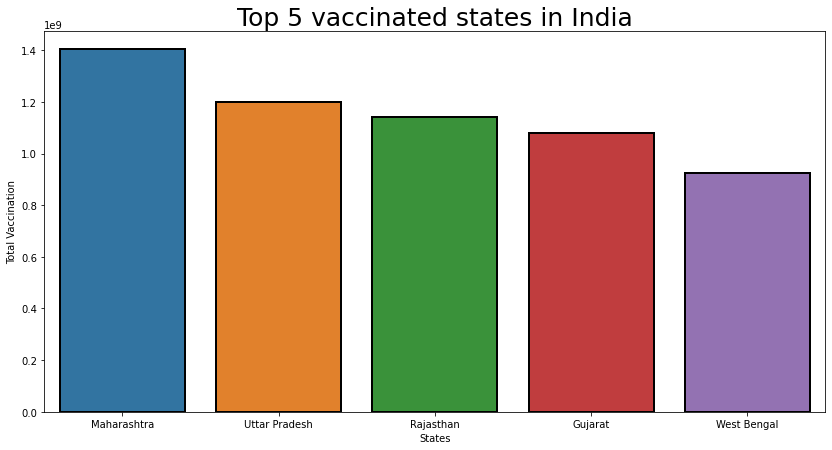

In [47]:
#Top 5 vaccinated states in India
top_5_vac_states = vaccine.groupby('State')['Total', 'Date'].sum().sort_values('Total', ascending = False).reset_index()
fig = plt.figure(figsize = (14,7))
ax = sns.barplot(top_5_vac_states[:5], x = 'State', y = 'Total', linewidth = 2, edgecolor = 'black')
plt.title("Top 5 vaccinated states in India", size = 25)
plt.xlabel("States")
plt.ylabel("Total Vaccination")
plt.show()

C:\Users\NOBODY\AppData\Local\Temp\ipykernel_8920\2113886462.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



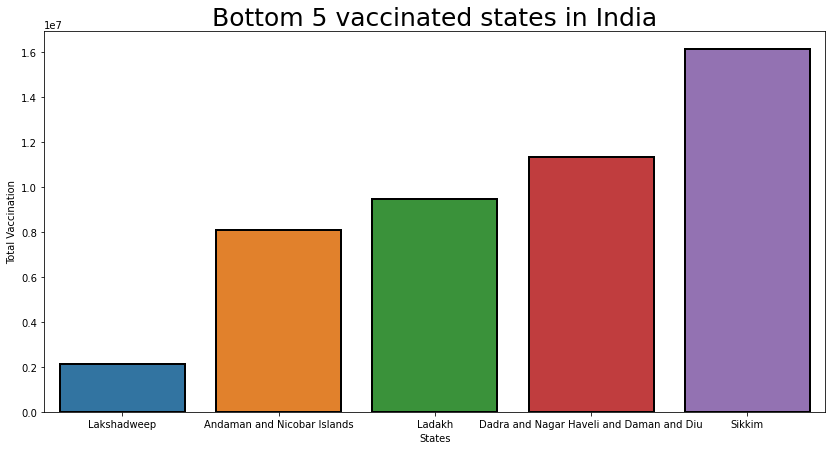

In [48]:
#Bottom 5 vaccinated states in India
bottom_5_vac_states = vaccine.groupby('State')['Total', 'Date'].sum().sort_values('Total', ascending = True).reset_index()
fig = plt.figure(figsize = (14,7))
ax = sns.barplot(bottom_5_vac_states[:5], x = 'State', y = 'Total', linewidth = 2, edgecolor = 'black')
plt.title("Bottom 5 vaccinated states in India", size = 25)
plt.xlabel("States")
plt.ylabel("Total Vaccination")
plt.show()